# Assignment 8: Dimensionality Reduction

#### Student: Rodolfo Lerma

Dataset(s) needed: MNIST ("Modified National Institute of Standards and Technology") dataset.

# Learning Objectives
- Be able to make application decisions regarding principal component analysis to train and test data 
- Produce a dimensionality reduction model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
mnist.data.shape

(70000, 784)

As it is possible to see the data set contains 70000 data points with 784 features.

In [5]:
mnist.target.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
mnist.target.isnull().sum()

0

In this dataset we do not have missing labels.

In [7]:
X = mnist.data / 255.0
y = mnist.target

### Splitting the data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Verification point for the size of the Test and Train Data sets

In [9]:
print(X_test.shape, y_test.shape)

(21000, 784) (21000,)


In [10]:
print(X_train.shape, y_train.shape)

(49000, 784) (49000,)


### Exploration

In [11]:
df = pd.concat([mnist.data, mnist.target], axis = 1) 
df['label'] = df['class'].apply(lambda i: str(i)) #To transform the variable to string
df = df.drop(['class'], axis = 1)
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [12]:
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [13]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
rndperm

array([46730, 48393, 41416, ..., 54886,   860, 15795])

<Figure size 432x288 with 0 Axes>

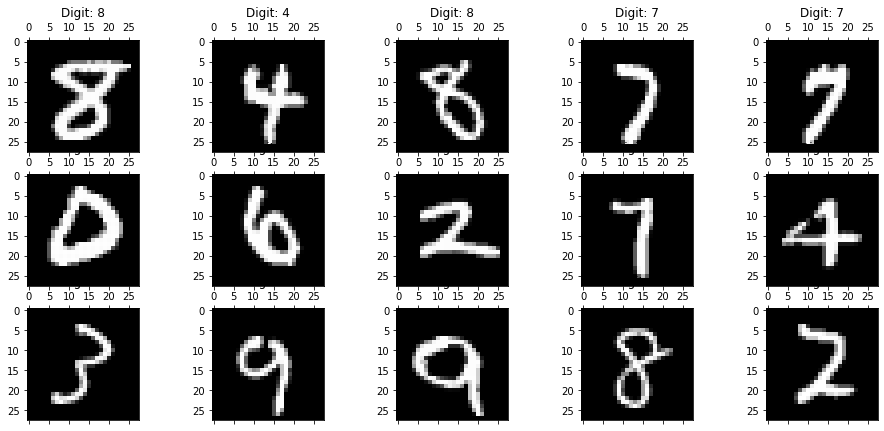

In [14]:
#Examples of the data present in the dataset
feat_cols = df.columns.tolist()
feat_cols.remove('label')
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

Example of the data present in this dataset.

### Question 2: Train a Logistic Regression classifier on the dataset. Set solver = lbfgs and random_state = 42. Hint you might also want to think about the multi_class parameter and if you need to set that.  You want to track how long the model takes to run.

In [15]:
from sklearn.linear_model import LogisticRegression
import time

#Initializing time for comparison
time_start = time.time()

#Regression Model
lr = LogisticRegression(solver='lbfgs', 
                        max_iter= 10000, 
                        multi_class = 'multinomial',
                        random_state=42)
lr.fit(X_train, y_train)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 55.30679392814636 seconds


### Question 3: Evaluate the resulting model on the test set.

In [16]:
# Use score method to get accuracy of model
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)
print('The accuracy for this model is: ' + str(round(lr_acc, 4) *100) + '%')

The accuracy for this model is: 92.06%


The model took around `52 seconds` to run and had a `92% accuracy`.

### Question 4: Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [18]:
#Normalization
standardized_scalar = StandardScaler()
standardized_scalar.fit(X_train)
X_train_std = standardized_scalar.transform(X_train)
X_test_std = standardized_scalar.transform(X_test)

In [19]:
# Make an instance of the Model
pca = PCA(.95) #Contraint given to the PCA model to obtain a model that explain the 95% of variation
pca.fit(X_train_std)
print('Number of Components: {}'.format(pca.n_components_))

#Transform the Features
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

Number of Components: 327


### Question 5: Train a new Logistic Regression classifier on the reduced dataset and see how long it takes. Use the same criteria as before just with PCA. Was training much faster? Explain your results

In [20]:
#Regression Model
time_start = time.time()
pca_lr = LogisticRegression(solver='lbfgs', 
                        max_iter= 10000, 
                        multi_class = 'multinomial',
                        random_state=42)
pca_lr.fit(X_train_pca, y_train)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 35.224125385284424 seconds


In this case it is possible to notice that compared with the initial model which took `52 seconds` and obtained an Accuracy of `92%`, this model with 327 features pretty much was able to obtain the `same accuracy` in 2/3 of the original time (`35 seconds`). In this case it is possible to the improvement in time, but this would be much more noticeable as the dataset and data points increase. In this particular example the 2nd model ran with half of the number of the original variables, which in turn decrease the time in a significant percentage.

### Question 6: Evaluate the new classifier on the test set: how does it compare to the previous classifier? Discuss the speed / accuracy trade-off and in which case you'd prefer a very slight drop in model performance for a x-time speedup in training.

In [21]:
#Performance
y_pred_pca = pca_lr.predict(X_test_pca)
lr_acc_pca = accuracy_score(y_test, y_pred_pca)
print('The accuracy for this model is: ' + str(round(lr_acc_pca, 4) *100) + '%')

The accuracy for this model is: 92.2%


In this case the performance for the model was kept, mostly for the number of variables that were kept for this analysis while the time reduced significantly.

# Some other comparisons

### Analysis using PCA on the entire dataset (not only the TRAIN portion), but without normalization.

In [22]:
#PCA
pca_other = PCA(.95)
lower_dimensional = pca_other.fit_transform(df[feat_cols])
print('Number of Components: {}'.format(pca_other.n_components_))

Number of Components: 154


Here in this case the number of features is even smaller than before, this is given the fact that we are using all the dataset.

In [23]:
#Splitting the data
X_train_lower, X_test_lower, y_train_lower, y_test_lower = train_test_split(lower_dimensional, y, test_size=0.3, random_state=42)

#Regression Model
time_start = time.time()
lower_lr = LogisticRegression(solver='lbfgs', 
                        max_iter= 10000, 
                        multi_class = 'multinomial',
                        random_state=42)
lower_lr.fit(X_train_lower, y_train_lower)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

#Performance
y_pred_lower = lower_lr.predict(X_test_lower)
lr_acc_lower = accuracy_score(y_test_lower, y_pred_lower)
print('The accuracy for this model is: ' + str(round(lr_acc, 4) *100) + '%')

Time elapsed: 337.9697251319885 seconds
The accuracy for this model is: 92.06%


The accuracy given by the model is comparable to the one that we saw before, but the time needed to run this model was actually 6 times longer just by not normalizing the data. 

### Analysis using PCA on the entire dataset (not only the TRAIN portion), but with normalization.

In [24]:
#Normalization
standardized_scalar = StandardScaler()
standardized_scalar.fit(df[feat_cols])
X_std = standardized_scalar.transform(df[feat_cols])

#PCA
pca_other = PCA(.95)
lower_dimensional = pca_other.fit_transform(X_std)

#Splitting the data
X_train_lower, X_test_lower, y_train_lower, y_test_lower = train_test_split(lower_dimensional, y, test_size=0.3, random_state=42)

#Regression Model
time_start = time.time()
lower_lr = LogisticRegression(solver='lbfgs', 
                        max_iter= 10000, 
                        multi_class = 'multinomial',
                        random_state=42)
lower_lr.fit(X_train_lower, y_train_lower)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

#Performance
y_pred_lower = lower_lr.predict(X_test_lower)
lr_acc_lower = accuracy_score(y_test_lower, y_pred_lower)
print('The accuracy for this model is: ' + str(round(lr_acc, 4) *100) + '%')

Time elapsed: 37.181939363479614 seconds
The accuracy for this model is: 92.06%


As we can see here the accuracy is the same, but the time it took to run compared to the previous model is 1/10 or in other words this model is ten times faster. It is clear that we have improvements from the PCA model, but as we saw before those improvements could be smaller compared to the ones we obtain by `normalizing` the data.

# Analysis/Comparison on the Loss Information/Data

For this section of the assignment I will explore how the data looks like with a 95% of Variace Explained compared to the original data set as well as how the data might look like if a lower level of Variance Explained is used.

In [25]:
pca_new = PCA(.95)
lower_dimensional_data = pca_new.fit_transform(mnist.data)
pca_new.n_components_

154

In [26]:
approximation = pca_new.inverse_transform(lower_dimensional_data)
array = np.array(df[feat_cols].iloc[2].tolist())

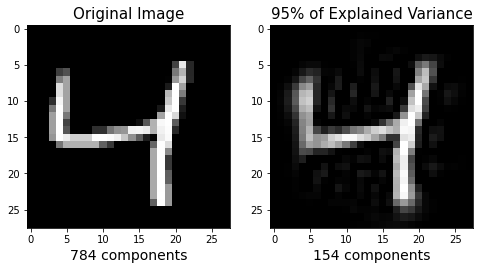

In [27]:
# Initial plots
plt.figure(figsize=(8,4));

#Original Image
plt.subplot(1, 2, 1);
plt.imshow(array.reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 15);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[2].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 15);

In [28]:
#General comparison taking all the Features of the model
pca = PCA()
pca.fit(mnist.data)
pca.n_components_

784

In [29]:
# Summing explained variance
tot = sum(pca.explained_variance_)

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.746115922494749, 7.155444586878729, 6.149530980723043, 5.4033845285481785, 4.888933703877895]


In [30]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp) 

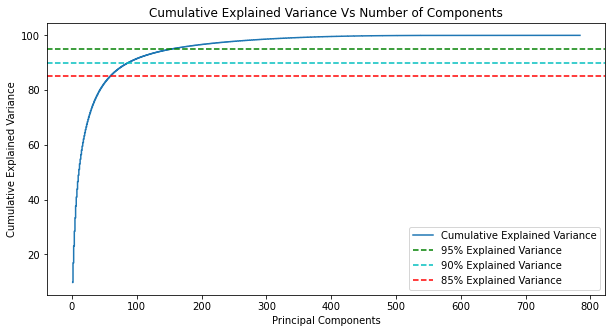

In [31]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Vs Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.axhline(y = 95, color='g', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

In [32]:
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]
#Number of features needed to get to each of the noted levels
componentsVariance

[784, 331, 154, 87, 59]

In [33]:
from sklearn.decomposition import PCA

# This is an extremely inefficient function. Will get to why in a later tutorial
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

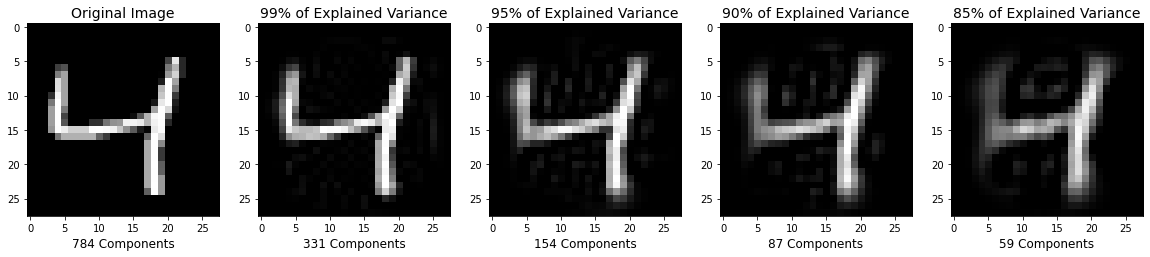

In [34]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(array.reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, mnist.data)[2].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, mnist.data)[2].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, mnist.data)[2].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, mnist.data)[2].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);

Based on this small example it is possible to notice the loss of information given by the selection of the Variance that is desired to be explained by PCA technique.

### Question 7. Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: 

This was a very interesting assignment as PCA is widely used when working on a highly dimensional data. My experience using PCA usually was during the data exploration phase and almost never in an actual implementation to reduce the number of variables in a Regression (or Logistic Regression) problem. The main reason was that even though it is an amazing tool to reduce the number of variables, the transformation to a different space using the a linear combination of the available features makes the features that come out of it hard to interpret. Therefore usually we would use PCA to find the main axis and see what features had high values for that particular axis to see if there was any particular grouping that could help on the feature selection process.


I learned the importance of centering and scaling (normalizing) your data as the results are sensitive to this process (or the lack of). Another important thing to notice is the improvement on the time domain, which is an amazing advantage of this technique. This time reduction make sense since the regression model is technically seeing less variables/features and therefore is less computationally expensive.